# Ejercicios de `Python` CdeC2016

Calcular el numero de segundos en un año

In [1]:
seg_min, min_hr, hr_dia, dia_anio = 60, 60, 24, 365
seg_min * min_hr * hr_dia * dia_anio

31536000

Escribir un programa que imprima 0 si un programa es palindrome, -1 si no. 

``Pista palabra[::-1] regresa la palabra al reves``

In [3]:
palabra = 'anitalavalatina'
valor = palabra[::-1] == palabra
valor -= 1
valor

0

# Funciones
Escribir una funcion que identifique el numero mas grande de un par

e.g. mas_grande(1,2) -> 2

In [5]:
def mas_grande_par(a,b):
    """identifica numero mas grande de un par"""
    if a>b:
        return a
    else: return b
mas_grande_par(1,2)

2

Funcion que identifique el número más grande de un grupo de tres.

In [7]:
def mas_grande_trio(a,b,c):
    """
    identifica el numero mas grande de un trio
    """
    grande1 = mas_grande_par(a,b)
    grande2 = mas_grande_par(grande1, c)
    return grande2
mas_grande_trio(1,2,3)

3

Escribir función para identificar palíndromes.

In [13]:
def pal(palabra):
    """Identifica palindromes"""
    valor = palabra[::-1] == palabra
    return valor - 1
pal('anita')

-1

Escribir una funcion que regrese nucleotidos complementarios (una sola letra)

``e.g. complementario('A') -> 'T'``

In [9]:
def base_comp(base):
    """Regresa el nucleotido complementario"""
    # Convertir a minusculas
    base = base.lower()
    if base == 'a':
        return 'T'
    elif base == 't':
        return 'A'
    elif base == 'g':
        return 'C'
    elif base == 'c':
        return 'G'
base_comp('a')

'T'

Calcular un factorial

``e.g. factorial(10) --> 3628800``

In [21]:
def factorial(n):
    """Calcula factorial"""
    for i in range(1,n): n*=i
    return n
print(factorial(10))

3628800


Calcular secuencia de ADN complementaria de una secuencia especificada en una lista

``e.g.  complemento('atgc') - > 'tacg'``

In [22]:
def sec_comp(secuencia):
    """Calcula secuencia de ADN complementaria"""
    complemento = ''
    for b in secuencia:
        complemento += base_comp(b)
    return complemento
print(sec_comp('ATGC'))

TACG


Crear un diccionario con el código genético.

In [1]:
# Bases de ADN
bases = ['T', 'C', 'A', 'G']

# Hacer lista de codones
codones = []
for b1 in bases:
    for b2 in bases:
        for b3 in bases:
            codones += [b1 + b2 + b3]
# Usando sintaxis de list comprehensions
codones2 = [b1 + b2 + b3 for b1 in bases for b2 in bases for b3 in bases] 
assert codones == codones2

# Amino acidos
aminoacidos = 'FFLLSSSSYY**CC*WLLLLPPPPHHQQRRRRIIIMTTTTNNKKSSRRVVVVAAAADDEEGGGG'
# Hacer diccionario
dic_codon = dict(zip(codones, aminoacidos))

Funcion para traducir una secuencia de ADN a partir de una lista de codones (fácil), o de una secuencia de ADN en un string (difícil). 

``e.g. traducir(ATGGGTTAA) -> MG*``

In [42]:

def traducir_codones_ADN(secuencia):
    """Traduce ADN a proteina de una lista dividida en codones"""
    proteina = ''
    for codon in secuencia: proteina += dic_codon[codon]
    return proteina

print(traducir_codones_ADN(['ATG','GGT','TAA']))

def traducir_ADN(secuencia):
    """Traduce ADN a proteina"""
    proteina = ''
    indices = range(0, len(secuencia), 3)
    for i in range(0, int(len(secuencia)/3)): 
        proteina += dic_codon[secuencia[indices[i]:indices[i]+3]]
    return proteina

print(traducir_ADN('ATGGGTTAA'))

MG*
MG*


# Numpy y Matplotlib
Comparar velocidad de una función escrita en python y una función de numpy.
Para este ejemplo, escribir una funcion que sume los elementos de una lista

``e.g. suma([1,2]) -->3``

In [11]:
# importar numpy
import numpy as np
#para tener las graficas en esta pagina
%matplotlib inline

# Crear una matriz de 10 mil numeros aleatorios entre 0 y 1
x = np.random.random(10000)

# Funcion de python para sumar
def python_sum(x):
    """Suma los numeros de x"""
    x_sum = 0.0
    for n in x:
        x_sum += n
    return x_sum

# Comparar velocidad
suma_python = %timeit -o python_sum(x)
suma_numpy = %timeit -o x.sum()
print('La suma de numpy es ~{0:0.0f}x mas rapida que una funcion escrita en python!'.format(suma_python.best/suma_numpy.best))

1000 loops, best of 3: 1.3 ms per loop
The slowest run took 7.30 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.52 µs per loop
La suma de numpy es ~200x mas rapida que una funcion escrita en python!


Crear y graficar lineas

/Users/porfirio/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


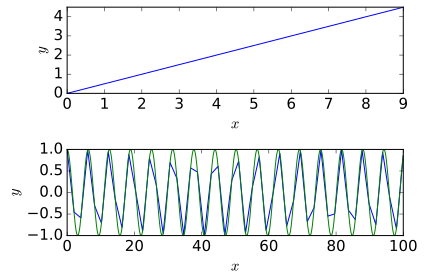

In [13]:
#para tener las graficas en esta pagina
%matplotlib inline
# Para hacer graficos SVG inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
import matplotlib as mpl
# parametros para matplotlib
tamano_fuente = 15
params = {'xtick.labelsize':tamano_fuente,'ytick.labelsize':tamano_fuente, 
          'axes.labelsize':tamano_fuente, 'figure.autolayout':True}
# actualizar parametros
mpl.rcParams.update(params)

def linea(m, x, b):
    """Funcion de una linea"""
    return m * x + b
# hacer la linea
m, x, b = 0.5, np.arange(10), 0
y = linea(m,x,b)

# graficar
fig, axes = plt.subplots(2)
axes[0].plot(x, y)
axes[0].set_ylabel('$y$')
axes[0].set_xlabel('$x$')
axes[0].set_yticks(range(0,5))

# graficar coseno
x = np.linspace(0,100)
axes[1].plot(x, np.cos(x))
axes[1].set_xlabel('nombre aqui')
x_smooth = np.linspace(0,100,1000)
axes[1].plot(x_smooth, np.cos(x_smooth))
axes[1].set_ylabel('$y$')
axes[1].set_xlabel('$x$')
#plt.savefig('ejemplo.pdf')

Demostracion de seaborn y bokeh con graficos matplotlib

In [16]:
# Seaborn para gráficas más pro
import seaborn as sns
# importar paquetes de bokeh
import bokeh.io
import bokeh.mpl
import bokeh.plotting
# Configurar Bokeh para plots inline
bokeh.io.output_notebook()

# Crear una matriz aleatoria con 10 mil puntos
x = np.random.random(10000)
# graficarla
plt.plot(x,'.')

# Hacer plot interactivo con bokeh (esta linea va despues de hacer el plot)
bokeh.plotting.show(bokeh.mpl.to_bokeh())

Loading BokehJS ...

/Users/porfirio/anaconda/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:227: UserWarning: Unable to handle marker: .; defaulting to Circle
  warnings.warn("Unable to handle marker: %s; defaulting to Circle" % style['marker'])
